In [16]:
import numpy as np
import random
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import mnist
from keras import backend as K
from matplotlib.pyplot import imshow
from PIL import Image

In [17]:
model_name = 'LeNet'
epoch = '10'

json_file = open(model_name + "_arch.json", 'r')
loaded_json = json_file.read()
json_file.close()
model = model_from_json(loaded_json)

In [18]:
if epoch != '':
    model.load_weights('weigths/' + model_name + '_' + epoch + '_weig.h5')
else:
    model.load_weights('weigths/' + model_name + '_weig.h5')

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(), metrics=['accuracy'])


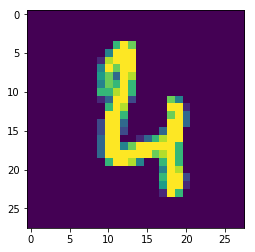

In [19]:
(_, _), (test_x, test_y) = mnist.load_data()

num = int(random.random() * 10000)
testImage = (np.array(test_x[num], dtype='float')).reshape(28, 28)
imshow(testImage)

In [20]:
if model_name == 'basic' or model_name == 'basic3':
    test = test_x[num].reshape((1, 784)).astype('float32') / 255
    print(model.predict_classes(test))
if model_name == 'LeNet':
    K.set_image_dim_ordering('th')
    test = test_x[num].astype('float32') / 255
    test = test[np.newaxis, np.newaxis, :, :]
    print(model.predict_classes(test))


[4]
